# Challenge of the Week
---
© 2023, Zaka AI, Inc. All Rights Reserved.
## Case Study: Insurance Medical Cost Prediction

**Objective:**

In this exercise, you will explore a dataset of insurance data detailed below. You will build a model from scratch using Gradient Descent to predict the cost of treatment for individuals based on their age, sex, bmi and other information.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from this library the functions train_test_split and LinearRegression

In [ ]:
#Test Your Zaka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Read & visualize data
You should have the dataset on a csv file. To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function.
Then display the head of your dataset

In [ ]:
#Test Your Zaka
# clone git repo
!git clone https://github.com/royaad/AIC
# change working directory
%cd AIC/Week_02/data

Cloning into 'AIC'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 37 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), 30.66 KiB | 3.07 MiB/s, done.
/content/AIC/Week_02/data


In [ ]:
#Specifying the filenames
filename = 'insurance.csv'
#Reading the files with read_csv
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [ ]:
#Test Your Zaka
nrows, ncols = df.shape
print(f"df has {nrows} rows and {ncols} columns")

df has 1338 rows and 7 columns


Use the function **info()**, to check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
#Test Your Zaka
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Use the function **describe()** to can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
#Test Your Zaka
df.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of charges

First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.
To do this plot the histogram for the charges

<Axes: xlabel='charges', ylabel='Count'>

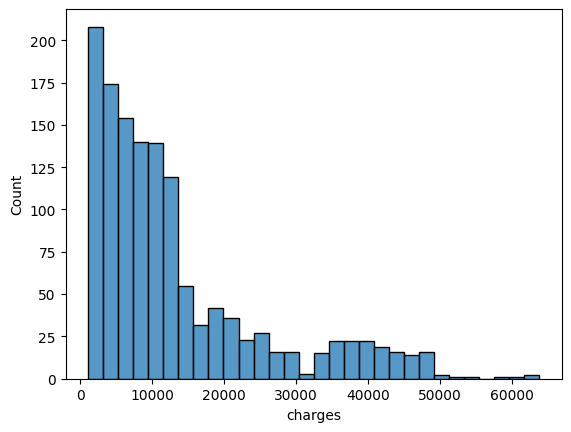

In [ ]:
#Test Your Zaka
col = 'charges'
#hist plot
plt.figure()
sns.histplot(x=col,data=df,bins=30)

#### Correlation between smoking and cost of treatment

Let's see if smokers spend more or less on treatment than non-smokers!

First, separate the dataset between 2: smokers and non_smokers, and then see how many smokers vs non-smokers we have.

In [ ]:
#Test Your Zaka
#we do not need to split the data. We can sns hue settings.
#df_Sm is for smokers
df_Sm = df[(df['smoker']=='yes')]
#df_NoSm is non-smoker
df_NoSm = df[(df['smoker']=='no')]

plot the distribution of charges for both smokers and non smokers

<Axes: xlabel='charges', ylabel='Count'>

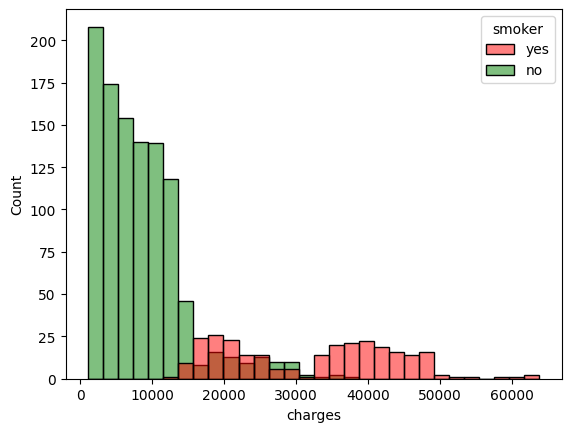

In [ ]:
#Test Your Zaka
col = 'charges'
#hist plots for accepted and rejected Loans
plt.figure()
sns.histplot(x=col,data=df,hue='smoker',bins=30,palette=['r','g'])

Who spends more on treatment? Smokers or non Smokers?

**Smokers spend more money on treatment.**

#### Correlation between age and cost of treatment

First, plot the distribution of age in our dataset

<Axes: xlabel='age', ylabel='Count'>

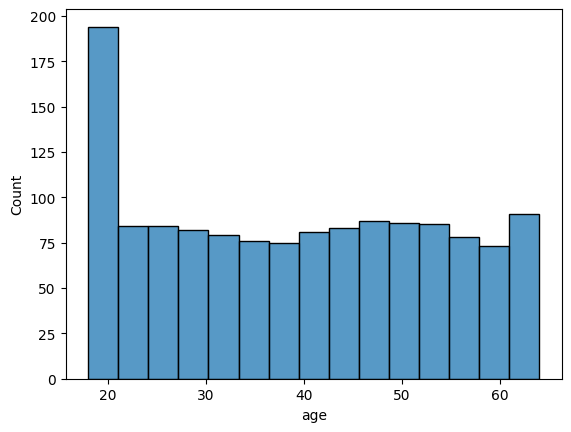

In [ ]:
#Test Your Zaka
col = 'age'
#hist plot
plt.figure()
sns.histplot(x=col,data=df,bins=15)

plot the correlation between age and cost of treatment

<Axes: xlabel='age', ylabel='charges'>

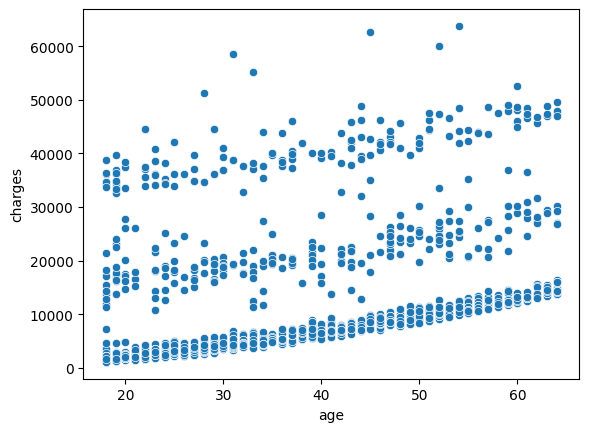

In [ ]:
#Test Your Zaka
colx = 'age'
coly = 'charges'
#scatter plot
plt.figure()
sns.scatterplot(x=colx,y=coly,data=df)

Let's check if smoking also affects this curve.

**Task**: show a scatter plot with the correlation between age and cost of treatment while showing smokers in red and non-smokers in blue

<Axes: xlabel='age', ylabel='charges'>

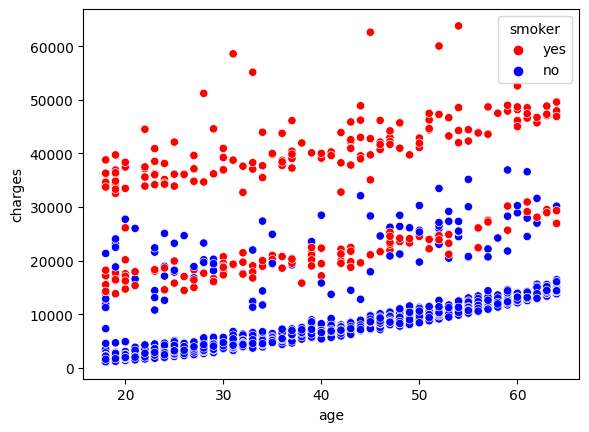

In [ ]:
#Test Your Zaka
colx = 'age'
coly = 'charges'
#scatter plot
plt.figure()
sns.scatterplot(x=colx,y=coly,data=df,hue='smoker',palette=['r','b'])

#### Correlation between BMI and cost of treatment

# Body Mass Index

![alt text](https://4.bp.blogspot.com/-nBF9Z1tFGhI/W3MqbdD0j7I/AAAAAAAAAIs/UdyXTIxsBT8Pl8usABxEK_Fusj5S0SnBQCLcBGAs/s1600/HOW%2BTO%2BCALCULATE%2BBODY%2BMASS%2BINDEX%2BBMI.jpg)

# BMI Chart

![BMI char](https://images.squarespace-cdn.com/content/v1/56fae4be1d07c0c393d8faa5/1551103826935-HCXS8U78500C06GQ1PLJ/ke17ZwdGBToddI8pDm48kNMeyc_nGAbaGjp3EBJ2o08UqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKckzCNDuUMr1wTvf7-fqd2hrX5O2-_PoO3UJ2jNU1VzJbe6G9-F0r9BTATNUu-NBMy/BMI+Chart.jpg)

First, plot the distribution of BMI in our dataset.

<Axes: xlabel='bmi', ylabel='Count'>

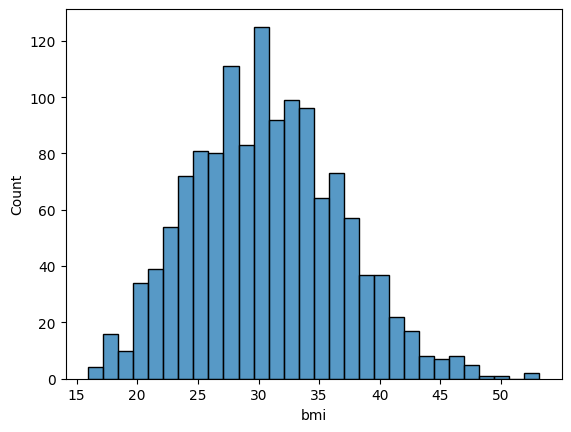

In [ ]:
#Test Your Zaka
col = 'bmi'
#hist plot
plt.figure()
sns.histplot(x=col,data=df,bins=30)

According to the chart above, obesity starts at BMI = 30. Let's investigate the impact of BMI on cost of treatment.
Separate the dataset between 4 datasets: one for obese, one for overweight, one for healthy, and one for underweight, and then, give the number of examples that we have for each of those classes.

In [ ]:

#Test Your Zaka
obese = df[df['bmi'] >= 30]
print(f"We have {obese.shape[0]} obese persons")
overweight = df[ (df['bmi']>=25) & (df['bmi']<30) ]
print(f"We have {overweight.shape[0]} overweight persons")
healthy = df[ (df['bmi']>=18) & (df['bmi']<25) ]
print(f"We have {healthy.shape[0]} healthy persons")
underweight = df[df['bmi'] < 18]
print(f"We have {underweight.shape[0]} underweight persons")

We have 705 obese persons
We have 385 overweight persons
We have 230 healthy persons
We have 15 underweight persons


To compare, plot the distribution of charges for all 3 groups (obese, overweight and healthy) in 1 plot, while showing `obese` data in red, `overweight` data in yellow and `healthy` data in green.

<Axes: xlabel='charges', ylabel='Count'>

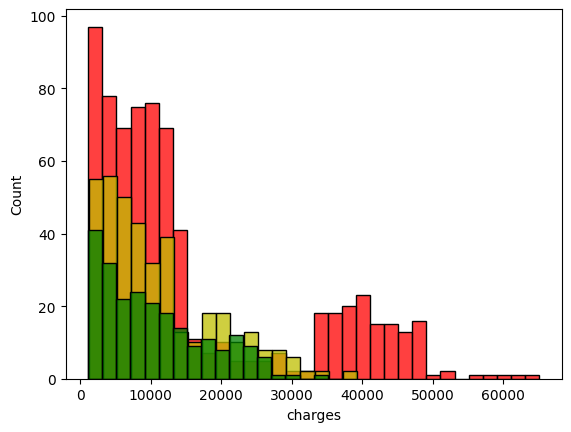

In [ ]:
#Test Your Zaka
col = 'charges'
#hist plot
plt.figure()
sns.histplot(x=col,data=obese,binwidth=2000,color='r')
sns.histplot(x=col,data=overweight,binwidth=2000,color='y')
sns.histplot(x=col,data=healthy,binwidth=2000,color='g')

Patients with BMI above 30 spend more on treatment!

**Yes, people with higher BMI spend more on treatment. We see that for obese people charges can exceed 40,000 and reach 65,000.**

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



Start by seeing how many missing data you have in each column

In [ ]:
#Test Your Zaka
print ("Missing values per column:\n")
print (df.isnull().sum(axis = 0))

Missing values per column:

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64


drop rows with missing values

In [ ]:
#Test Your Zaka
#Dropping na values
df.dropna(inplace=True)

make sure you don't have any nulls using the info() function

In [ ]:
#Test Your Zaka
#Checking that the drop is OK
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Remove unused columns

Let's remove the `region` column since we don't really care about it

In [ ]:
#Test Your Zaka
#Dropping region.
df.drop("region", axis=1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [ ]:
#Test Your Zaka
sexdict = {'male' : 0, 'female' : 1}
#inplace does not work for apply.
df['sex'] = df['sex'].apply(lambda x: sexdict[x])
df.head(10)

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
5,31,1,25.740,0,0,3756.62160
6,46,1,33.440,1,0,8240.58960
7,37,1,27.740,3,0,7281.50560
8,37,0,29.830,2,0,6406.41070
9,60,1,25.840,0,0,28923.13692


And now the smokers column

In [ ]:
#Test Your Zaka
smokerdict = {'no' : 0, 'yes' : 1}
df['smoker'] = df['smoker'].apply(lambda x: smokerdict[x])
df.head(10)

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,1,16884.92400
1,18,male,33.770,1,0,1725.55230
2,28,male,33.000,3,0,4449.46200
3,33,male,22.705,0,0,21984.47061
4,32,male,28.880,0,0,3866.85520
5,31,female,25.740,0,0,3756.62160
6,46,female,33.440,1,0,8240.58960
7,37,female,27.740,3,0,7281.50560
8,37,male,29.830,2,0,6406.41070
9,60,female,25.840,0,0,28923.13692


#### Normalization

Let's scale all the columns by dividing by the maximum

First get the maximum of each column

In [ ]:
#Test Your Zaka
MAX = df.max()
print(MAX)

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
charges     63770.42801
dtype: float64


Divide each column by its maximum value

In [ ]:
#Test Your Zaka
df = df.divide(MAX)
df.describe()

,age,sex,bmi,children,smoker,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. MultiLinear Regression Model Training



#### Data splits

Before training, we need to split data into training (80%) & testing (20%) using a random_state of 42.
Print the shape of your training and testing data.

In [ ]:
#Test Your Zaka
# store all columns except last one as inputs in X
X_charges = df.iloc[:,0:-1].values
# store the last column as the output (label) in y
y_charges = df.iloc[:,-1].values

# split dataset in a 80/20 split
x_charges_train, x_charges_test, y_charges_train, y_charges_test = train_test_split(X_charges, y_charges, test_size=0.2, random_state=42)
print(x_charges_train.shape, y_charges_train.shape)
print(x_charges_test.shape, y_charges_test.shape)

(1068, 5) (1068,)
(267, 5) (267,)


### Optimization Using Gradient Descent

We remind you that this is a multi linear regression problem <br>
* The equation is y = **a0** + **a1** * x1 + **a2** * x2 + **a3** * x3 + **a4** * x4 + **a5** * x5 <br>
In other words, we have the following: <br>
* charges = **a0** + **a1** * age + **a2** * sex + **a3** * bmi + **a4** * children + **a5** * smoker
*   We call the numpy vector a the vector containing the parameters a = [a0, a1, a2, a3, a4, a5]
* The goal is to find the best vector a


Implement the function Gradient_descent that has the following specifications. Beware of the naming of the variables

In [ ]:
def Gradient_descent (x, y, learning_rate, nb_iterations, initial_a):

  #Test Your Zaka
  n = x.shape [0]
  a0 = initial_a[0]
  a1 = initial_a[1]
  a2 = initial_a[2]
  a3 = initial_a[3]
  a4 = initial_a[4]
  a5 = initial_a[5]

  costs = []

  for i in range (nb_iterations):
    y_pred = a0 + a1 * x[:,0] + a2 * x[:,1] + a3 * x[:,2] + a4 * x[:,3] + a5 * x[:,4]

    diff = y - y_pred
    a0_der = -2*np.sum(diff)/n
    a1_der = -2*np.sum(x[:,0] * diff)/n
    a2_der = -2*np.sum(x[:,1] * diff)/n
    a3_der = -2*np.sum(x[:,2] * diff)/n
    a4_der = -2*np.sum(x[:,3] * diff)/n
    a5_der = -2*np.sum(x[:,4] * diff)/n

    a0 -= learning_rate * a0_der
    a1 -= learning_rate * a1_der
    a2 -= learning_rate * a2_der
    a3 -= learning_rate * a3_der
    a4 -= learning_rate * a4_der
    a5 -= learning_rate * a5_der

    costs.append(np.sum(diff ** 2)/n)

  return costs, np.array([a0, a1, a2, a3, a4, a5])

Now that we have the function ready, we can use it to obtain the optimum coefficient values, and use them for future predictions.

Initialize the number of iteration as 10000, and the learning rate as 0.1. Then write the model equation you obtained

In [ ]:
#Test Your Zaka
initial_a = [0.5] * 6

learning_rate = 0.1

nb_iterations = 10000

costs_GD, a_GD = Gradient_descent(x_charges_train,y_charges_train,learning_rate, nb_iterations, initial_a)

print(f'the obtained equation is: \ny = {a_GD[0]} + {a_GD[1]}*x1 + {a_GD[2]}*x2 + {a_GD[3]}*x3 + {a_GD[4]}*x4 + {a_GD[5]}*x5')

the obtained equation is: 
y = -0.17731121694151858 + 0.2534012389123808*x1 + 0.006363051322093376*x2 + 0.2468421903547308*x3 + 0.042542331780645794*x4 + 0.36661390495673046*x5


Plot the cost function

Text(0.5, 0, 'Iteration')

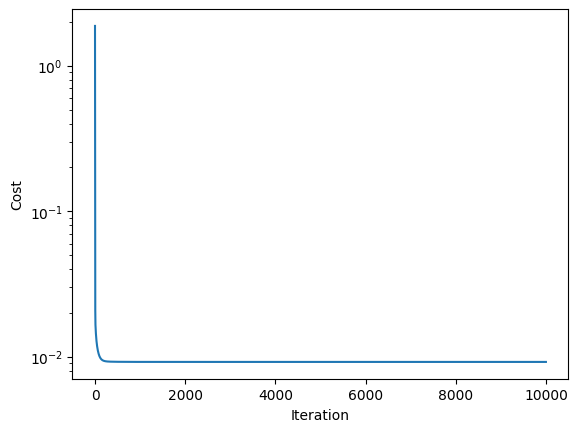

In [ ]:
#Test Your Zaka
plt.figure()
plt.plot(costs_GD)
plt.yscale('log')
plt.ylabel('Cost')
plt.xlabel('Iteration')

###Predicting Using Vectorized Gradient Descent

Of course you noted some redundancy in the Gradient Descent implementation, this is why we opt to use a vectorized notation that might be a bit more difficult, but the concept remains the same.
This representation will be useful especially when your number of features starts to increase!

In [ ]:
def Gradient_descent_vectorized (x, y, learning_rate, nb_iterations, initial_a):

  #Test Your Zaka
  n = x.shape [0] #number of points
  a = initial_a
  #concatenate does not work here .c_ works better
  x = np.c_[np.ones(n),x]

  #we can also so do it by separating a0 from the rest.
  #this should decrease the number of calculations.
  #however, it will require more lines of code to consider 1D and 2D matrices.
  #this code does some useless calculations for a0, however it is mathematically more elegant.
  #and it is more conform with the mathematical matrix notation y = X*β
  a_der = np.zeros(len(a))

  for i in range (nb_iterations):
    y_pred = np.dot(x,a)

    diff = y - y_pred

    for k in range(len(a_der)):
      a_der[k] = -2*np.dot(x[:,k], diff)/n
      a[k] -= learning_rate * a_der[k]
  #be careful about return indentation
  return a

Train your model using the vectorized notation with the same initializations that you did previously. Then write the equation you obtained for your model.

In [ ]:
#Test Your Zaka
initial_a = [0.5] * 6

learning_rate = 0.1

nb_iterations = 10000

a_GDV = Gradient_descent_vectorized(x_charges_train,y_charges_train,learning_rate, nb_iterations, initial_a)

print(f'the obtained coefficients are: \n {a_GDV[1:]}')

the obtained coefficients are: 
 [0.2534012389123808, 0.006363051322093378, 0.24684219035473068, 0.04254233178064582, 0.36661390495673046]


You should obtain the same result as above.

Write a function that you'll use to make predictions

In [ ]:
def predict_medical_charges (a, x):

  #Test Your Zaka

  charges = a[0] + np.dot(x,a[1:])

  return charges

make a prediction of the medical charges on the first example we have in our training set

In [ ]:
#Test Your Zaka
pred_charges = predict_medical_charges(a_GDV,x_charges_train[0,:])
pred_charges *= MAX[-1]
print(pred_charges)

8171.171851774351


###Linear Regression Model Evaluation

Now we will evaluate our model with the metrics that we studied during the course. In order to do so, we will calculate the predicted values on the test set.

In [ ]:
#Test Your Zaka
pred_charges = predict_medical_charges(a_GDV,x_charges_test)
pred_charges *= MAX[-1]

Let's get the number of examples in the test set.

In [ ]:
#Test Your Zaka
print(f'the number of examples in test set is {len(pred_charges)}')

the number of examples in test set is 267


####Mean Absolute Error (MAE)

Calculate the MAE between the predicted and the real values

In [ ]:
#Test Your Zaka

MAE_value = np.mean(abs(y_charges_test*MAX[-1] - pred_charges))
print(f'The MAE is {MAE_value}')

The MAE is 4217.590932650646


####Mean Squared Error (MSE)

Calculate the MSE

In [ ]:
#Test Your Zaka

MSE_value = np.mean((y_charges_test*MAX[-1] - pred_charges) ** 2)
print(f'The MSE is {MSE_value}')

The MSE is 34169808.825480364


####Root Mean Squared Error (RMSE)

This is just the root of the MSE that we computed. This is another metric we can look at to evaluate our regression models.

In [ ]:
#Test Your Zaka
RMSE_value = np.sqrt(MSE_value)
print(f'The RMSE is {RMSE_value}')

The RMSE is 5845.494745997156


### Prediction Using Scikit Learn Library


Now to validate the results that we got, we will use the scikit learn library to give us the values of the coefficients that we got using Gradient Descent.
for this purpose, you have to build a linear regression mode, and fit it on the training data

In [ ]:
#Test Your Zaka
# define our regression model
model = LinearRegression()

# train our model
model.fit(x_charges_train, y_charges_train)
print('Model trained!')

Model trained!


####Features importance (Coefficients)

Get the importance of each of your features, and compare the results with the ones you obtained in your gradient descent.

<Axes: ylabel='feature'>

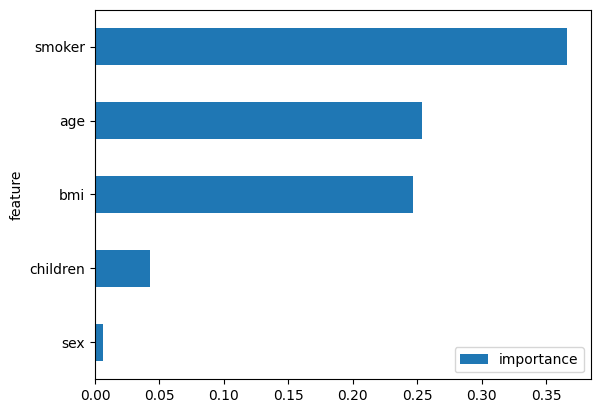

In [ ]:
#Test Your Zaka
weights = model.coef_
feature_names = df.columns[0:-1].values
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
#we care about the absolute value
feature_importance["importance"] = abs(weights)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=True)
feature_importance.plot.barh(x='feature', y='importance')

In [ ]:
print(f'the coefficients obtained using scikit are:\n {weights}')
print(f'the coefficients obtained using our implememtation are: \n {np.round(a_GDV[1:],8)}')

print(f'the intercept obtained using scikit are:\n {np.round(model.intercept_,8)}')
print(f'the intercept obtained using our implememtation are: \n {np.round(a_GDV[0],8)}')

the coefficients obtained using scikit are:
 [0.25340124 0.00636305 0.24684219 0.04254233 0.3666139 ]
the coefficients obtained using our implememtation are: 
 [0.25340124 0.00636305 0.24684219 0.04254233 0.3666139 ]
the intercept obtained using scikit are:
 -0.17731122
the intercept obtained using our implememtation are: 
 -0.17731122


**The coefficients obtained using both methods are the same**

You should obtain the same coefficient values in the 3 approaches that we considered. Our computed values from GD are the same as the values that we got from scikit learn, which means the implementation was correct.

####Evaluation using Scikit learn

Now we will compute the same metrics we computed earlier but using the sklearn library.

We start by calculating the predicted values for this model.

In [ ]:
#Test Your Zaka
predicted_charges = model.predict(x_charges_test)*MAX[-1]
print(len(predicted_charges))

267


Now we will evaluate the sklearn model using the sklearn library to get error metrics (MAE, MSE, RMSE)

In [ ]:
#Test Your Zaka
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import math

print(f'the MAE is {MAE(y_charges_test*MAX[-1],predicted_charges)}')
print(f'the MSE is {MSE(y_charges_test*MAX[-1],predicted_charges)}')
print(f'the RMSE is {math.sqrt(MSE(y_charges_test*MAX[-1],predicted_charges))}')

the MAE is 4217.590933001885
the MSE is 34169808.821944
the RMSE is 5845.49474569467


**The values should be so close to the ones we got from the model you built yourself.**

Calculate the R2 value using the model.score() function

In [ ]:
#Test Your Zaka
print('Model score {}'.format(model.score(x_charges_test,y_charges_test)))

Model score 0.8043792068989463




---
#Classification based on several features with Gradient Descent

Now, we will predict based on all the features that we have if the person is smoker or not a smoker, and we'll use GD as optimization tool.
We'll follow the same steps as above.

Split your data between training (80%) and testing (20%), and print the shapes of your training and testing data. Use random state of 42

In [ ]:
#Test Your Zaka
# store all columns except smoker one as inputs in X
X_smoker = df.iloc[:,lambda x: x.columns != 'smoker'].values
# this is equivalent to X = df.iloc[:,[0,1,2,3,5]].values
# store the smoker column as the output (label) in y
y_smoker = df.iloc[:,-2].values

# split dataset in a 80/20 split
x_smoker_train, x_smoker_test, y_smoker_train, y_smoker_test = train_test_split(X_smoker, y_smoker, test_size=0.2, random_state=42)
# the fit gave a better accuracy with random_state=0 instead of 42
# we can check for other random states
print(x_smoker_train.shape, y_smoker_train.shape)
print(x_smoker_test.shape, y_smoker_test.shape)

(1068, 5) (1068,)
(267, 5) (267,)


##Optimization using Gradient Descent

Now we will implement Gradient Descent to do this classification between smoker and non-smoker.

###Sigmoid Function

start by implementing the sigmoid function

In [ ]:
def sigmoid(v):
  #Test Your Zaka
  return 1/(1+np.exp(-v))

Now, we start with Gradient Descent for classification.

We remind you that this is a classification based on several features <br>
* The equation is y = sigmoid(**a0** + **a1** * x1 + **a2** * x2 + **a3** * x3 + **a4** * x4 + **a5** * x5) <br>
In other words, we have the following: <br>
* smoker = sigmoid(**a0** + **a1** * age + **a2** * sex + **a3** * bmi + **a4** * children + **a5** * charges)
* This represents the probability of a person being smoker given the features that we mentioned.
*   We call the numpy vector a the vector containing the parameters a = [a0, a1, a2, a3, a4, a5]
* The goal is to find the best vector a

Build the Gradient_descent_Classification function. Pay attention to the parameters provided.

In [ ]:
def Gradient_descent_classification (x, y, learning_rate, nb_iterations, initial_a):

  #Test Your Zaka
  n = x.shape [0] #number of points
  a = initial_a
  # concatenate does not work here .c_ works better
  x = np.c_[np.ones(n),x]

  a_der = np.zeros(len(a))
  costs = []

  for i in range (nb_iterations):
    y_pred = np.dot(x,a)
    #inject y_pred to sigmoid
    y_pred = sigmoid(y_pred)
    diff = y - y_pred
    #natural log for the loss function
    #however, any log base woud work.
    loss = -y*np.log(y_pred)-(1-y)*np.log(1-y_pred)
    costs.append(np.mean(loss))

    for k in range(len(a_der)):
      #the factor for a_der is now -1 not -2
      a_der[k] = -1*np.dot(x[:,k], diff)/n
      a[k] -= learning_rate * a_der[k]

  return costs, a

Now, we will train our model. Set the number of iterations to 10000, the learning rate to 0.1, and print the equation of the model you obtained.

In [ ]:
#Test Your Zaka
#The initial values were selected bases on an initial run.
#We can select any random values.
initial_a = [5,-5,-0.5,-15,-0.5,20]

#learning rate of 0.2 gave better results
learning_rate = 0.1

nb_iterations = 10000
# increasing the iterations give better accuracy since the cost is still decreasing.

costs_GDC, a_GDC = Gradient_descent_classification(x_smoker_train,y_smoker_train,learning_rate, nb_iterations, initial_a)

print(f'the obtained coefficients are: \n {a_GDC[1:]}')

the obtained coefficients are: 
 [-5.093557678595346, -0.5324021615937267, -15.209412067734432, -0.9679332327845387, 20.830539497432014]


Plot the cost function

Text(0.5, 0, 'Iteration')

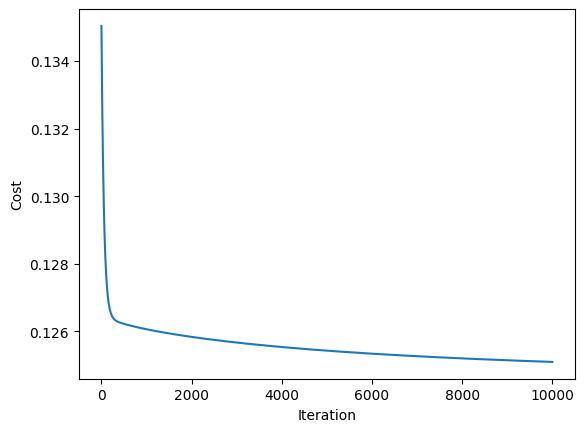

In [ ]:
#Test Your Zaka
plt.figure()
plt.plot(costs_GDC)
#plt.yscale('log')
plt.ylabel('Cost')
plt.xlabel('Iteration')
#plt.xlim([2000, 8000])
#plt.ylim([0, .2])

Now to predict we implement the following function that takes multiple examples in one numpy array x, and the parameters a, and gives back the prediction made for each example.
<br>**Reminder:** If the output of the sigmoid function is >0.5, we consider the output is 1, otherwise, we consider it 0

In [ ]:
def predict_smoker(x, a):

  #Test Your Zaka
  #Will need the probability for ROC
  smoker = a[0] + np.dot(x,a[1:])
  proba = sigmoid(smoker)
  infer = np.round(proba)

  return proba, infer

Make predictions on your test data using the predict_smoker: Compute the predictions associated with your test set

In [ ]:
#Test Your Zaka
pred_proba, pred_smoker = predict_smoker(x_smoker_test,a_GDC)

print(pred_smoker)

[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0.]


##Classifier Evaluation

Now you will evaluate your classifier

###Accuracy Score

Compute the accuracy score of your classifier

In [ ]:
#Test Your Zaka
y_wrong = np.count_nonzero(y_smoker_test - pred_smoker, axis = 0)
accuracy = (len(y_smoker_test)-y_wrong)/len(y_smoker_test)
print(f'The accuracy is: {accuracy}')

The accuracy is: 0.9662921348314607


###Confusion Matrix

Compute the decision matrix for your classifier

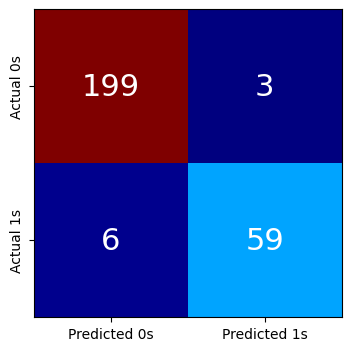

In [ ]:
#Test Your Zaka
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_smoker_test,pred_smoker)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm,cmap='jet')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.set_yticks((0, 1))
ax.set_yticklabels(labels=('Actual 0s', 'Actual 1s'),rotation = 90,va='center')

ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white',fontsize=22)
plt.show()

**Classifier is able to predict 0s and 1s with good accuracy.**


---
##Extras

The next sections are not required. I am just comparing my implementation with SciKit and plotting ROC.

###SciKit Learn Logistic Regression

Model trained!
[-2.25193289 -0.25422858 -3.077714   -0.36117191 10.06549021]
Model score 0.898876404494382


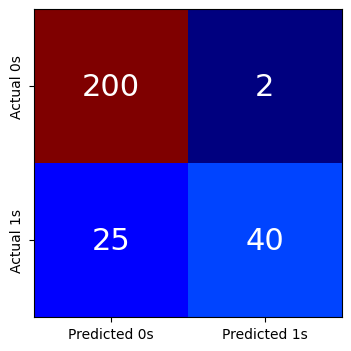

In [ ]:
from sklearn.linear_model import LogisticRegression

# define our regression model
model = LogisticRegression()

# train our model
model.fit(x_smoker_train, y_smoker_train)
print('Model trained!')
# weights
weights = model.coef_[0]
print(weights)

print('Model score {}'.format(model.score(x_smoker_test,y_smoker_test)))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_smoker_test, model.predict(x_smoker_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm,cmap='jet')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.set_yticks((0, 1))
ax.set_yticklabels(labels=('Actual 0s', 'Actual 1s'),rotation = 90,va='center')

ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white',fontsize=22)
plt.show()

###Plotting ROC (Just for fun)

The AUC score is: 0.9958111195734958


Text(0.5, 0, 'False Positive Rate')

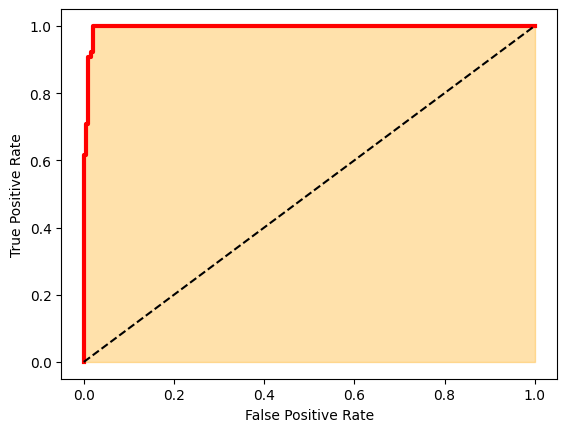

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_smoker_test, pred_proba)
AUC = roc_auc_score(y_smoker_test, pred_proba)
print(f'The AUC score is: {AUC}')
#create ROC curve
plt.figure()
plt.plot(fpr,tpr,'r',linewidth=3)
plt.fill_between(fpr,tpr,color='orange',alpha=.33)
plt.plot([0,1],[0,1],'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')